In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import statsmodels.api as sm

from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from statsmodels.miscmodels.ordinal_model import OrderedModel

# Processing OLS

In this first section, we will construct a linear model of to predict the household prices of California from the 1990s.

In [7]:
california = fetch_california_housing()

df = pd.DataFrame(california.data, columns=california.feature_names)

df['MedHouseVal'] = california.target

In [9]:
# Define the independent variables
X = df[["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup"]]

# Define the dependent variable 
y = df['MedHouseVal']

# Add a constant (intercept)
X = sm.add_constant(X)

In [10]:
# Fit the OLS regression model
ols_model = sm.OLS(y, X)
ols_results = ols_model.fit()

In [11]:
# Display the summary of the results
print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     4032.
Date:                Thu, 19 Sep 2024   Prob (F-statistic):               0.00
Time:                        15:31:25   Log-Likelihood:                -24235.
No. Observations:               20640   AIC:                         4.848e+04
Df Residuals:                   20633   BIC:                         4.854e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4391      0.028    -15.918      0.0

([<matplotlib.axis.YTick at 0x7fedc8173a60>,
 [Text(0, 0, 'const'),
  Text(0, 1, 'AveRooms'),
  Text(0, 2, 'AveOccup'),
  Text(0, 3, 'Population'),
  Text(0, 4, 'HouseAge'),
  Text(0, 5, 'MedInc'),
  Text(0, 6, 'AveBedrms')])

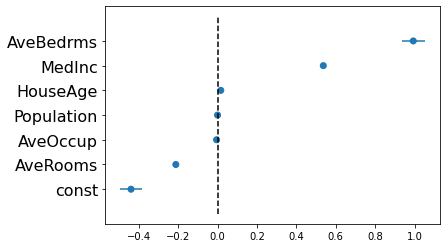

In [12]:
R = ols_results.summary().tables[1].data
R = pd.DataFrame(R)
R.columns = R.iloc[0]
R = R.iloc[1:]
R[R.columns[1:]] = R[R.columns[1:]].astype(float)
R.columns = ["vari", "coef", "std_err", "t", "p_val", "low_b", "up_b" ]

R = R.sort_values("coef", ascending = True)
R = R.reset_index(drop=True)

p = 0.1
R["alpha"] = (R.p_val < 0.05 ) * (1-p) + p

plt.hlines(R.index, R.low_b, R.up_b, alpha = R.alpha)
plt.scatter(R.coef, R.index, alpha = R.alpha)

plt.vlines(0,0-1,len(R), linestyle="--", color = "black")

plt.yticks(R.index,R.vari, fontsize=16)

# Logistic Regression

Your turn: Using the Titanic dataset and the variables below, created a logistic regression model for whether individuals survived or not.
* IVs: 'pclass', 'age', "sibsp", "fare", "adult_male"
* DV: "survived"

In [87]:
# Load the Titanic dataset
df = sns.load_dataset('titanic')

In [88]:
x_cols = ['pclass', 'age', 
          "sibsp", "fare", "adult_male"
         ]
y_col  = "survived"

df = df[x_cols+[y_col]].dropna()

In [89]:
# Define the dependent variable (Survived) and independent variables (Pclass, Age)
X = df[x_cols]
y = df[y_col]

# Add a constant (intercept)
X = sm.add_constant(X)

In [90]:
X.adult_male = X.adult_male.astype(int)

In [91]:
# Create and fit the logistic regression model
logit_model = sm.Logit(y, X)
logit_results = logit_model.fit()

# Display the summary of the logistic regression results
print(logit_results.summary())

Optimization terminated successfully.
         Current function value: 0.422273
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      708
Method:                           MLE   Df Model:                            5
Date:                Thu, 19 Sep 2024   Pseudo R-squ.:                  0.3748
Time:                        18:07:04   Log-Likelihood:                -301.50
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 5.819e-76
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0049      0.606      8.253      0.000       3.816       6.194
pclass        -1.2419      0.

In [94]:
# Predict survival probability for different people
new_passenger = pd.DataFrame({"const":[1], 'pclass': [3], 'age': [10],
                              "sibsp":[0], "fare":[700], "adult_male":[0],
                             })

# Predict the probability of survival
predicted_prob = logit_results.predict(new_passenger)
print(f"Predicted probability of survival: {predicted_prob[0]:.2f}")

Predicted probability of survival: 0.93


([<matplotlib.axis.YTick at 0x7fede9b37d60>,
 [Text(0, 0, 'adult_male'),
  Text(0, 1, 'pclass'),
  Text(0, 2, 'sibsp'),
  Text(0, 3, 'age'),
  Text(0, 4, 'fare'),
  Text(0, 5, 'const')])

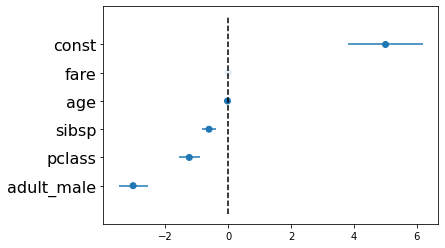

In [19]:
R = logit_results.summary().tables[1].data
R = pd.DataFrame(R)
R.columns = R.iloc[0]
R = R.iloc[1:]
R[R.columns[1:]] = R[R.columns[1:]].astype(float)
R.columns = ["vari", "coef", "std_err", "t", "p_val", "low_b", "up_b" ]

R = R.sort_values("coef", ascending = True)
R = R.reset_index(drop=True)

p = 0.1
R["alpha"] = (R.p_val < 0.05 ) * (1-p) + p

plt.hlines(R.index, R.low_b, R.up_b, alpha = R.alpha)
plt.scatter(R.coef, R.index, alpha = R.alpha)

plt.vlines(0,0-1,len(R), linestyle="--", color = "black")

plt.yticks(R.index,R.vari, fontsize=16)

## In-class or home practice: Multinomial Regression

The UCI dataset with ID 109 is the Wine Quality Dataset, which contains information about different types of wines, including several chemical properties and a quality rating. Since the quality ratings are on a scale from 0 to 10, this dataset is ideal for multinomial logistic regression, where the goal is to predict the quality of wine based on its chemical properties.

For this exercise, you will want to use sm.MNLogit

In [29]:
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
X = X[['Alcohol', 'Malicacid', 'Ash', 'Total_phenols']]
y = wine.data.targets 

In [ ]:
X = wine.data.features

In [31]:
X = sm.add_constant(X)

In [33]:
# Create the multinomial logistic regression model
multinomial_model = sm.MNLogit(y, X)

# Fit the model to the training data
multinomial_results = multinomial_model.fit()

# Display the summary of the model results
print(multinomial_results.summary())

Optimization terminated successfully.
         Current function value: 0.314237
         Iterations 8
                          MNLogit Regression Results                          
Dep. Variable:                  class   No. Observations:                  178
Model:                        MNLogit   Df Residuals:                      168
Method:                           MLE   Df Model:                            8
Date:                Thu, 19 Sep 2024   Pseudo R-squ.:                  0.7107
Time:                        17:27:23   Log-Likelihood:                -55.934
converged:                       True   LL-Null:                       -193.31
Covariance Type:            nonrobust   LLR p-value:                 9.582e-55
      class=2       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            65.3780     11.015      5.935      0.000      43.788      86.968
Alcohol          -4.

([<matplotlib.axis.YTick at 0x7fedb81df0a0>,
 [Text(0, 0, 'Alcohol'),
  Text(0, 1, 'Ash'),
  Text(0, 2, 'Total_phenols'),
  Text(0, 3, 'Malicacid'),
  Text(0, 4, 'const')])

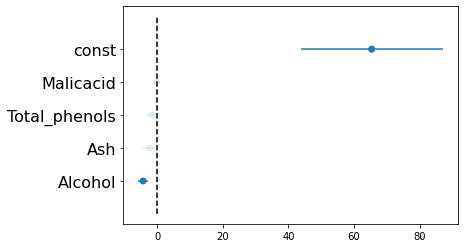

In [59]:
R = multinomial_results.summary().tables[1].data
R = pd.DataFrame( R[:6] )
R.columns = R.iloc[0]
R = R.iloc[1:]
R[R.columns[1:]] = R[R.columns[1:]].astype(float)
R.columns = ["vari", "coef", "std_err", "t", "p_val", "low_b", "up_b" ]

R = R.sort_values("coef", ascending = True)
R = R.reset_index(drop=True)

p = 0.1
R["alpha"] = (R.p_val < 0.05 ) * (1-p) + p

plt.hlines(R.index, R.low_b, R.up_b, alpha = R.alpha)
plt.scatter(R.coef, R.index, alpha = R.alpha)

plt.vlines(0,0-1,len(R), linestyle="--", color = "black")

plt.yticks(R.index,R.vari, fontsize=16)

In [76]:
R = multinomial_results.summary().tables[1].data
R1 = pd.DataFrame( R[:6] )
R1.columns = R1.iloc[0]
R1 = R1.iloc[1:]
R1[R1.columns[1:]] = R1[R1.columns[1:]].astype(float)
R1.columns = ["vari", "coef", "std_err", "t", "p_val", "low_b", "up_b" ]
# R1 = R1.iloc[1:]

([<matplotlib.axis.YTick at 0x7fedc9150d00>,
 [Text(0, 1, 'const'),
  Text(0, 2, 'Alcohol'),
  Text(0, 3, 'Malicacid'),
  Text(0, 4, 'Ash'),
  Text(0, 5, 'Total_phenols')])

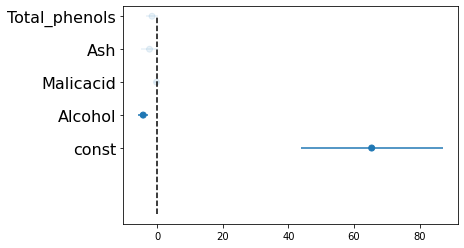

In [77]:
p = 0.1
R1["alpha"] = (R1.p_val < 0.05 ) * (1-p) + p

plt.hlines(R1.index, R1.low_b, R1.up_b, alpha = R1.alpha)
plt.scatter(R1.coef, R1.index, alpha = R1.alpha)

plt.vlines(0,0-1,len(R1), linestyle="--", color = "black")

plt.yticks(R1.index,R1.vari, fontsize=16)

In [78]:
R2 = pd.DataFrame( R[6:] )
R2.columns = R2.iloc[0]
R2 = R2.iloc[1:]
R2[R2.columns[1:]] = R2[R2.columns[1:]].astype(float)
R2.columns = ["vari", "coef", "std_err", "t", "p_val", "low_b", "up_b" ]

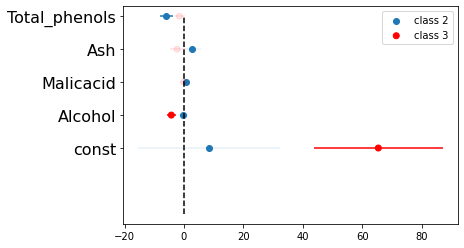

In [84]:
p = 0.1
R2["alpha"] = (R2.p_val < 0.05 ) * (1-p) + p

plt.hlines(R2.index, R2.low_b, R2.up_b, alpha = R2.alpha)
plt.scatter(R2.coef, R2.index, label="class 2")

plt.vlines(0,0-1,len(R2), linestyle="--", color = "black")

plt.yticks(R2.index,R2.vari, fontsize=16)

plt.hlines(R1.index, R1.low_b, R1.up_b, alpha = R1.alpha, color="red")
plt.scatter(R1.coef, R1.index, alpha = R1.alpha, color="red", label="class 3")


plt.yticks(R1.index,R1.vari, fontsize=16)

plt.legend()